# 0.0. Imports 

In [1]:
import requests
import pandas as pd
import numpy  as np
import pickle
import seaborn as sns
#from sklearn import model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import ElasticNet
from sklearn.metrics         import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing   import MinMaxScaler

# 0.1. Loading Data

In [2]:
csv_url = 'dataset/winequality-red.csv';
df_raw = pd.read_csv( csv_url, sep=';' )
df_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_raw['quality'].drop_duplicates().sort_values()

459    3
18     4
0      5
3      6
7      7
267    8
Name: quality, dtype: int64

# 1.0. Data Preparation

In [4]:
df1 =  df_raw.copy()

# 1.1. Rescaling

In [5]:
# min max scaler
# x_new = ( x_old - min() ) / ( max - min )
mms = MinMaxScaler()

In [6]:
# free sulfur dioxide
df1['free sulfur dioxide'] = mms.fit_transform( df1[['free sulfur dioxide']].values )
pickle.dump( mms, open('/Users/santo/repos/Wine-Quality/deploy/free_sulfur_scaler.pkl', 'wb') )

# total sulfur dioxide
df1['total sulfur dioxide'] = np.log1p( df1['total sulfur dioxide'] )
df1['total sulfur dioxide'] = mms.fit_transform( df1[['total sulfur dioxide']].values )
pickle.dump( mms, open('/Users/santo/repos/Wine-Quality/deploy/total_sulfur_scaler.pkl', 'wb') )

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

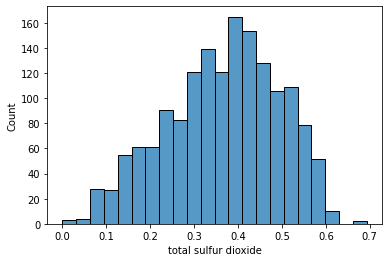

In [7]:
sns.histplot( np.log1p( df1['total sulfur dioxide'] ), kde=False )

In [8]:
train, test = train_test_split( df1 ) # 75% train e 25% test

In [9]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1285,11.3,0.37,0.50,1.8,0.090,0.267606,0.516999,0.99734,3.15,0.57,10.5,5
157,7.1,0.43,0.42,5.5,0.071,0.380282,0.782472,0.99730,3.42,0.71,10.5,5
757,8.1,0.87,0.00,2.2,0.084,0.126761,0.408120,0.99656,3.25,0.50,9.8,5
1219,9.0,0.39,0.40,1.3,0.044,0.338028,0.533279,0.99478,3.20,0.83,10.9,6
874,10.4,0.38,0.46,2.1,0.104,0.070423,0.121372,0.99664,3.12,0.65,11.8,7


In [10]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
599,12.7,0.590,0.45,2.3,0.082,0.140845,0.319440,1.00000,3.00,0.70,9.3,6
213,8.2,0.570,0.26,2.2,0.060,0.380282,0.602514,0.99590,3.30,0.43,10.1,5
10,6.7,0.580,0.08,1.8,0.097,0.197183,0.602514,0.99590,3.28,0.54,9.2,5
763,9.3,0.655,0.26,2.0,0.096,0.056338,0.439748,0.99738,3.25,0.42,9.6,5
618,11.4,0.460,0.50,2.7,0.122,0.042254,0.253617,1.00060,3.13,0.70,10.2,5


In [11]:
# train and test dataset
x_train = train.drop( 'quality', axis=1 )
y_train = train['quality']

x_test = test.drop( 'quality', axis=1 )
y_test = test['quality']

In [12]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1285,11.3,0.37,0.50,1.8,0.090,0.267606,0.516999,0.99734,3.15,0.57,10.5
157,7.1,0.43,0.42,5.5,0.071,0.380282,0.782472,0.99730,3.42,0.71,10.5
757,8.1,0.87,0.00,2.2,0.084,0.126761,0.408120,0.99656,3.25,0.50,9.8
1219,9.0,0.39,0.40,1.3,0.044,0.338028,0.533279,0.99478,3.20,0.83,10.9
874,10.4,0.38,0.46,2.1,0.104,0.070423,0.121372,0.99664,3.12,0.65,11.8


In [13]:
y_train.head()

1285    5
157     5
757     5
1219    6
874     7
Name: quality, dtype: int64

In [14]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
599,12.7,0.590,0.45,2.3,0.082,0.140845,0.319440,1.00000,3.00,0.70,9.3
213,8.2,0.570,0.26,2.2,0.060,0.380282,0.602514,0.99590,3.30,0.43,10.1
10,6.7,0.580,0.08,1.8,0.097,0.197183,0.602514,0.99590,3.28,0.54,9.2
763,9.3,0.655,0.26,2.0,0.096,0.056338,0.439748,0.99738,3.25,0.42,9.6
618,11.4,0.460,0.50,2.7,0.122,0.042254,0.253617,1.00060,3.13,0.70,10.2


In [15]:
y_test.head()

599    6
213    5
10     5
763    5
618    5
Name: quality, dtype: int64

# 2.0. ML Modelling

In [16]:
# model definition
model = ElasticNet( alpha=0.5, l1_ratio=0.5, random_state=42)

In [17]:
# training
model.fit( x_train, y_train )

ElasticNet(alpha=0.5, random_state=42)

In [18]:
# prediction
pred = model.predict( x_test )

In [19]:
pred

array([5.50338712, 5.60683618, 5.49045599, 5.54218052, 5.61976732,
       5.71028525, 5.9689079 , 5.52924939, 5.61976732, 5.72321638,
       5.82666544, 5.52924939, 5.51631826, 5.56804279, 5.52924939,
       5.46459372, 5.59390505, 5.71028525, 5.63269845, 5.52924939,
       5.51631826, 5.59390505, 5.56804279, 5.60683618, 5.76200978,
       5.83959657, 5.65856071, 5.43873146, 5.77494091, 5.51631826,
       5.9689079 , 5.73614751, 5.55511165, 5.8913211 , 5.74907864,
       5.56804279, 5.59390505, 5.74907864, 5.52924939, 5.51631826,
       5.71028525, 5.68442298, 5.76200978, 5.65856071, 5.54218052,
       5.73614751, 5.72321638, 5.58097392, 5.65856071, 5.8525277 ,
       5.65856071, 5.52924939, 5.77494091, 5.52924939, 5.59390505,
       5.82666544, 5.65856071, 5.49045599, 5.50338712, 5.64562958,
       5.54218052, 5.50338712, 5.55511165, 5.68442298, 5.8913211 ,
       5.65856071, 5.84606214, 5.55511165, 5.55511165, 5.78787204,
       5.77494091, 5.78787204, 5.59390505, 5.71028525, 5.82666

In [20]:
rmse = np.sqrt( mean_squared_error( y_test, pred ) )
mae = mean_absolute_error( y_test, pred )
r2 = r2_score( y_test, pred )

In [21]:
print( 'RMSE: {}'.format( rmse ) )
print( 'MAE: {}'.format( mae ) )
print( 'R2: {}'.format( r2 ) )

RMSE: 0.7578037936452335
MAE: 0.6338773977780805
R2: 0.10472806124760325


In [22]:
# saved trained model
pickle.dump( model, open( '/Users/santo/repos/Wine-Quality/deploy/model_wine_quality.pkl', 'wb' ) )

# 3.0. Prediction

In [23]:
df1.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
763,9.3,0.655,0.26,2.0,0.096,0.056338,0.439748,0.99738,3.25,0.42,9.6,5


In [31]:
df = df_raw.drop( 'quality', axis=1).sample()

In [33]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1216,7.9,0.57,0.31,2.0,0.079,0.126761,0.654172,0.99677,3.29,0.69,9.5


In [26]:
df_json = df.to_json( orient='records' )

In [27]:
df_json

'[{"fixed acidity":7.5,"volatile acidity":0.43,"citric acid":0.3,"residual sugar":2.2,"chlorides":0.062,"free sulfur dioxide":0.0704225352,"total sulfur dioxide":0.1662309524,"density":0.99495,"pH":3.44,"sulphates":0.72,"alcohol":11.5}]'

In [ ]:
#url = 'http:///0.0.0.0:5000/predict'
url = 'https://winequalitymodel.herokuapp.com/predict'
data = df_json
header = {'Content-type': 'application/json'}
# Request
r = requests.post( url=url, data=data, headers=header )

In [ ]:
r.status_code

In [ ]:
pd.DataFrame( r.json(), columns=r.json()[0].keys() )

# Class In Production

In [34]:
import pickle

class WineQuality( object ):
    def __init__( self ):
        self.free_sulfur_scaler = pickle.load( open('/Users/santo/repos/Wine-Quality/deploy/free_sulfur_scaler.pkl', 'rb') )
        self.free_sulfur_scaler = pickle.load( open('/Users/santo/repos/Wine-Quality/deploy/total_sulfur_scaler.pkl', 'rb') )
        
    def data_preparation( self, df ):
        # rescaling free sulfur
        df1['free sulfur dioxide'] = self.free_sulfur_scaler.transform( df1[['free sulfur dioxide']].value )
        # rescaling total sulfur
        df1['total sulfur dioxide'] = self.total_sulfur_scaler.transform( df1[['total sulfur dioxide']].values )
        
        return df

In [35]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1216,7.9,0.57,0.31,2.0,0.079,0.126761,0.654172,0.99677,3.29,0.69,9.5
